In [5]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [130]:
# each aminer_paper is around 10G with around 7,902,928 lines
# open file and select recent 15 yr papers with keyword and abstract record

data_dir = "..\\data\\oag2019\\"
all_num = np.arange(15)
for num in all_num:
    file_name = 'aminer_papers_'+str(num)+'.txt'
    print('filtering file:',file_name)
    out_name = 'filtered_aminer\\filtered_aminer_papers_'+str(num)+'.txt'

    f = open(data_dir+file_name,'r',encoding = 'utf8')
    out = open(data_dir+out_name,'w')
    for i, line in enumerate(f):
        if i % 100000 == 0:
            print('file '+str(num)+': ',round(i/7000000*100,1),"%")
        json_line = json.loads(line)
        if 'year' in json_line and 'keywords' in json_line and 'abstract' in json_line and 'lang' in json_line:
            if json_line['year'] >= 2004 and json_line['lang'] == 'en':
                out.write(line)
    out.close()
    f.close()

filtering file: aminer_papers_0.txt
file 0:  0.0 %
file 0:  1.4 %
file 0:  2.9 %
file 0:  4.3 %
file 0:  5.7 %
file 0:  7.1 %
file 0:  8.6 %
file 0:  10.0 %
file 0:  11.4 %
file 0:  12.9 %
file 0:  14.3 %
file 0:  15.7 %
file 0:  17.1 %
file 0:  18.6 %
file 0:  20.0 %
file 0:  21.4 %
file 0:  22.9 %
file 0:  24.3 %
file 0:  25.7 %
file 0:  27.1 %
file 0:  28.6 %
file 0:  30.0 %
file 0:  31.4 %
file 0:  32.9 %
file 0:  34.3 %
file 0:  35.7 %
file 0:  37.1 %
file 0:  38.6 %
file 0:  40.0 %
file 0:  41.4 %
file 0:  42.9 %
file 0:  44.3 %
file 0:  45.7 %
file 0:  47.1 %
file 0:  48.6 %
file 0:  50.0 %
file 0:  51.4 %
file 0:  52.9 %
file 0:  54.3 %
file 0:  55.7 %
file 0:  57.1 %
file 0:  58.6 %
file 0:  60.0 %
file 0:  61.4 %
file 0:  62.9 %
file 0:  64.3 %
file 0:  65.7 %
file 0:  67.1 %
file 0:  68.6 %
file 0:  70.0 %
file 0:  71.4 %
file 0:  72.9 %
file 0:  74.3 %
file 0:  75.7 %
file 0:  77.1 %
file 0:  78.6 %
file 0:  80.0 %
file 0:  81.4 %
file 0:  82.9 %
file 0:  84.3 %
file 0:  85

file 6:  108.6 %
file 6:  110.0 %
file 6:  111.4 %
file 6:  112.9 %
file 6:  114.3 %
file 6:  115.7 %
file 6:  117.1 %
file 6:  118.6 %
file 6:  120.0 %
file 6:  121.4 %
file 6:  122.9 %
file 6:  124.3 %
file 6:  125.7 %
file 6:  127.1 %
file 6:  128.6 %
file 6:  130.0 %
file 6:  131.4 %
file 6:  132.9 %
file 6:  134.3 %
file 6:  135.7 %
file 6:  137.1 %
file 6:  138.6 %
file 6:  140.0 %
file 6:  141.4 %
file 6:  142.9 %
file 6:  144.3 %
file 6:  145.7 %
file 6:  147.1 %
file 6:  148.6 %
file 6:  150.0 %
file 6:  151.4 %
file 6:  152.9 %
file 6:  154.3 %
file 6:  155.7 %
file 6:  157.1 %
file 6:  158.6 %
file 6:  160.0 %
file 6:  161.4 %
file 6:  162.9 %
file 6:  164.3 %
file 6:  165.7 %
file 6:  167.1 %
file 6:  168.6 %
file 6:  170.0 %
file 6:  171.4 %
file 6:  172.9 %
file 6:  174.3 %
file 6:  175.7 %
file 6:  177.1 %
file 6:  178.6 %
file 6:  180.0 %
file 6:  181.4 %
file 6:  182.9 %
file 6:  184.3 %
file 6:  185.7 %
file 6:  187.1 %
file 6:  188.6 %
file 6:  190.0 %
file 6:  191.4

file 11:  31.4 %
file 11:  32.9 %
file 11:  34.3 %
file 11:  35.7 %
file 11:  37.1 %
file 11:  38.6 %
file 11:  40.0 %
file 11:  41.4 %
file 11:  42.9 %
file 11:  44.3 %
file 11:  45.7 %
file 11:  47.1 %
file 11:  48.6 %
file 11:  50.0 %
file 11:  51.4 %
file 11:  52.9 %
file 11:  54.3 %
file 11:  55.7 %
file 11:  57.1 %
file 11:  58.6 %
file 11:  60.0 %
file 11:  61.4 %
file 11:  62.9 %
file 11:  64.3 %
file 11:  65.7 %
file 11:  67.1 %
file 11:  68.6 %
file 11:  70.0 %
file 11:  71.4 %
file 11:  72.9 %
file 11:  74.3 %
file 11:  75.7 %
file 11:  77.1 %
file 11:  78.6 %
file 11:  80.0 %
file 11:  81.4 %
file 11:  82.9 %
file 11:  84.3 %
file 11:  85.7 %
file 11:  87.1 %
file 11:  88.6 %
file 11:  90.0 %
file 11:  91.4 %
file 11:  92.9 %
file 11:  94.3 %
file 11:  95.7 %
file 11:  97.1 %
file 11:  98.6 %
file 11:  100.0 %
file 11:  101.4 %
file 11:  102.9 %
file 11:  104.3 %
file 11:  105.7 %
file 11:  107.1 %
file 11:  108.6 %
file 11:  110.0 %
file 11:  111.4 %
file 11:  112.9 %
file

file 12:  310.0 %
file 12:  311.4 %
file 12:  312.9 %
file 12:  314.3 %
file 12:  315.7 %
file 12:  317.1 %
file 12:  318.6 %
file 12:  320.0 %
file 12:  321.4 %
file 12:  322.9 %
file 12:  324.3 %
file 12:  325.7 %
file 12:  327.1 %
file 12:  328.6 %
file 12:  330.0 %
file 12:  331.4 %
file 12:  332.9 %
file 12:  334.3 %
file 12:  335.7 %
file 12:  337.1 %
file 12:  338.6 %
file 12:  340.0 %
file 12:  341.4 %
file 12:  342.9 %
file 12:  344.3 %
file 12:  345.7 %
file 12:  347.1 %
file 12:  348.6 %
file 12:  350.0 %
file 12:  351.4 %
file 12:  352.9 %
file 12:  354.3 %
file 12:  355.7 %
file 12:  357.1 %
file 12:  358.6 %
file 12:  360.0 %
file 12:  361.4 %
file 12:  362.9 %
file 12:  364.3 %
file 12:  365.7 %
file 12:  367.1 %
file 12:  368.6 %
file 12:  370.0 %
file 12:  371.4 %
file 12:  372.9 %
file 12:  374.3 %
file 12:  375.7 %
file 12:  377.1 %
file 12:  378.6 %
filtering file: aminer_papers_13.txt
file 13:  0.0 %
file 13:  1.4 %
file 13:  2.9 %
file 13:  4.3 %
file 13:  5.7 %
f

In [132]:
f = open(data_dir+out_name,'r',encoding = 'utf8')
year = [json.loads(line)['year'] for line in f]  
len(year)


1904283

C:\Users\ZKW\Anaconda3\envs\data-x\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


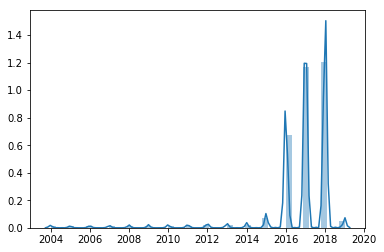

In [133]:
sns.distplot(year)

In [134]:
f = open(data_dir+out_name,'r',encoding = 'utf8')
key = [json.loads(line)['keywords'] for line in f]  
len(key)

1904283

In [152]:
key_unique = pd.unique([i for sub in key for i in sub])

In [156]:
key_len = [len(i.split(' ')) for i in key_flat]
c = Counter(key_len)
len(key_len)

10086241

In [159]:
c.most_common(6)

[(2, 4170452),
 (1, 4138879),
 (3, 1268872),
 (4, 355492),
 (5, 101190),
 (6, 29868)]

In [160]:
f = open(data_dir+out_name,'r',encoding = 'utf8')
abst = [json.loads(line)['abstract'] for line in f]  
abst_len = [len(i.split(' ')) for i in abst]
c = Counter(abst_len)

[(200, 14377), (150, 13816), (199, 13737), (198, 12571), (149, 12452), (250, 12099)]


array([ 18., 164., 329.])

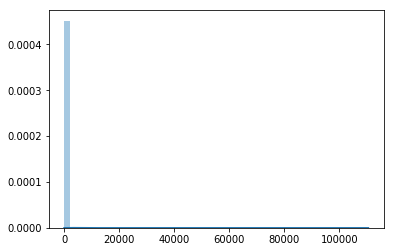

In [168]:
print(c.most_common(6))
sns.distplot(abst_len)
np.percentile(abst_len, [2.5, 50,97.5])

In [171]:
abst[1]

'The angular distributions of the unpolarised differential cross section and\ntensor analysing power $A_{xx}$ of the $\\vec{d}d\\to\\alpha \\eta$ reaction have\nbeen measured at an excess energy of 16.6 MeV. The ambiguities in the\npartial-wave description of these data are made explicit by using the invariant\namplitude decomposition. This allows the magnitude of the s-wave amplitude to\nbe extracted and compared with results published at lower energies. In this\nway, firmer bounds could be obtained on the scattering length of the $\\eta\n\\alpha$ system. The results do not, however, unambiguously prove the existence\nof a quasi-bound $\\eta \\alpha$ state.'